# Descriptive Stats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [3]:
user_info =pd.read_csv("user_info.csv")  
conversion = pd.read_csv("conversion_table.csv") 
data = user_info.merge(conversion, how='inner', on='user_id')
data = data.drop(['user_id'], axis=1)

In [11]:
data['country'].isna().sum()

25202

In [57]:
data.fillna("missing_country").groupby(['country']).size()

country
China               58971
Germany             13055
UK                  48449
US                 178092
missing_country     17631
dtype: int64

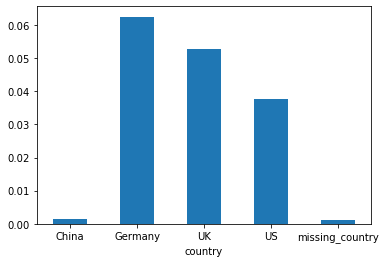

In [42]:
#check conversion rate of missing values vs non-missing values
data.fillna("missing_country").groupby(['country'])['converted'].mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

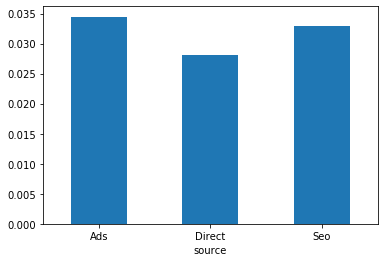

In [43]:
#check conversion rate for new users vs returning users
data.groupby(['source'])['converted'].mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

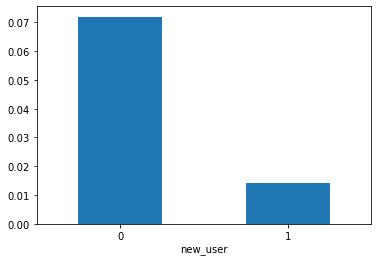

In [44]:
#check conversion rate for different sources 
# returning users have a much higher conversion rate 
data.groupby(['new_user'])['converted'].mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

In [45]:
data['age'].unique()

array([25, 23, 28, 39, 30, 31, 27, 29, 38, 43, 24, 36, 37, 33, 20, 35, 17,
       50, 22, 18, 34, 19, 42, 32, 21, 48, 40, 41, 26, 45, 44, 49, 46, 56,
       52, 54, 51, 47, 53, 60, 57, 55, 59, 61, 58, 62, 65, 63, 66, 67, 64,
       68, 69, 70, 73, 77, 72, 79])

In [46]:
#There are only two users with age > 100. Remove them
data[data['age']>110]
data = data[data['age']<110]

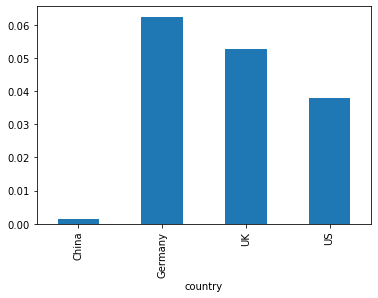

In [47]:
# ussers in China has a much lower conversion rate
data.groupby(['country'])['converted'].mean().plot.bar()
plt.show()

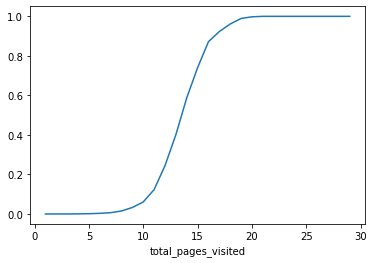

In [48]:
#users who spent more time on the website has a higher conversion rate
data.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

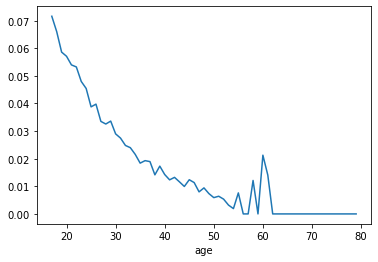

In [49]:
data.groupby(['age'])['converted'].mean().plot()
plt.show()

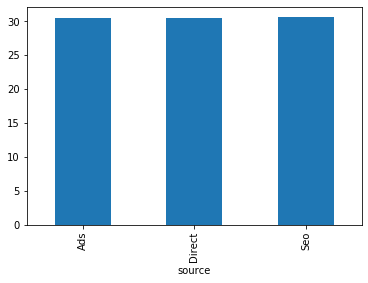

In [50]:
data.groupby(['source'])['age'].mean().plot.bar()
plt.show()

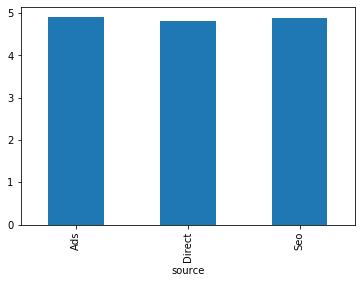

In [51]:
data.groupby(['source'])['total_pages_visited'].mean().plot.bar()
plt.show()

In [52]:
# most users came to the site by clicking on search results
data[data['country']=='China'].groupby(['source']).size()/len(data[data['country']=='China'])

source
Ads       0.282223
Direct    0.227519
Seo       0.490258
dtype: float64

In [53]:
data[data['country']=='Germany'].groupby(['source']).size()/len(data[data['country']=='Germany'])

source
Ads       0.288012
Direct    0.219380
Seo       0.492608
dtype: float64

In [54]:
data[data['country']=='US'].groupby(['source']).size()/len(data[data['country']=='US'])

source
Ads       0.280198
Direct    0.230005
Seo       0.489797
dtype: float64

In [55]:
data[data['country']=='UK'].groupby(['source']).size()/len(data[data['country']=='UK'])

source
Ads       0.278994
Direct    0.229747
Seo       0.491259
dtype: float64

In [56]:
data.drop('converted', axis=1).corr()

,age,new_user,total_pages_visited
age,1.000000,0.012445,-0.046093
new_user,0.012445,1.000000,-0.082522
total_pages_visited,-0.046093,-0.082522,1.000000


# Conclusion 
- The site has large user base in US and China. Customers in China have a much lower conversion rate. Users who choose to not reveal location also have a much lower conversion rate. This is an example of self-selection bias. The least engaged customers are the ones who choose not to reveal certain information.
- The user base is pretty young, young users tend to have a higher conversion rate
- The original conversion rate is 3%
- Traffic source has little effect on conversion rate
- Total page clicked is a strong indicator of conversion, but also the least actionable metric